In [ ]:
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# --- AYARLAR ---
BASE_DIR = Path("..") 
MODEL_PATH = BASE_DIR / "models/ultimate_colab.pt"
TEST_IMAGES_DIR = BASE_DIR / "data/raw/DENTEX/test/disease/input"

# Görselleştirme Ayarları
IMG_SIZE = 1280       
CONF_THRESHOLD = 0.25 

# Sınıf İsimleri ve Renkler
CLASS_NAMES = {0: 'Impacted', 1: 'Caries', 2: 'Lesion', 3: 'Deep Caries'}
# Renkler (RGB Formatında - Matplotlib için)
COLORS = {
    0: (0, 0, 255),    # Impacted: Mavi
    1: (255, 255, 0),  # Caries: Sarı
    2: (255, 0, 255),  # Lesion: Mor
    3: (255, 165, 0)   # Deep Caries: Turuncu
}

print(f"Model Yolu: {MODEL_PATH}")
print(f"Test Verisi: {TEST_IMAGES_DIR}")

Model Yolu: ../models/ultimate_colab.pt
Test Verisi: ../data/raw/DENTEX/test/disease/input


In [2]:
def apply_clahe(image):
    """
    Model CLAHE ile eğitildiği için teste giren resme de bunu uygulamalıyız.
    """
    # Görüntü renkli ise griye çevirip CLAHE yap, sonra renklendir
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    return cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

def plot_prediction(image, results, filename):
    """Tahminleri resim üzerine çizer ve inline gösterir."""
    plot_img = image.copy()
    
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            cls = int(box.cls[0])
            
            label = f"{CLASS_NAMES.get(cls, str(cls))} {conf:.2f}"
            # OpenCV BGR kullanır, biz RGB tanımladık, ters çevirelim
            color_rgb = COLORS.get(cls, (0, 255, 0))
            color_bgr = (color_rgb[2], color_rgb[1], color_rgb[0])
            
            # Kutu
            cv2.rectangle(plot_img, (x1, y1), (x2, y2), color_bgr, 3)
            
            # Etiket Arka Planı
            (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
            cv2.rectangle(plot_img, (x1, y1 - 30), (x1 + w, y1), color_bgr, -1)
            
            # Etiket Yazısı
            cv2.putText(plot_img, label, (x1, y1 - 8), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

    # Matplotlib ile göstermek için BGR -> RGB dönüşümü
    plot_img_rgb = cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(16, 10))
    plt.imshow(plot_img_rgb)
    plt.title(f"Tahmin: {filename}", fontsize=14)
    plt.axis('off')
    plt.show()

In [3]:
if MODEL_PATH.exists():
    print("🧠 Model yükleniyor...")
    model = YOLO(MODEL_PATH)
    print("✅ Model hazır!")
else:
    print(f"❌ HATA: Model bulunamadı! Lütfen yolu kontrol et: {MODEL_PATH}")

🧠 Model yükleniyor...
✅ Model hazır!


🖼️ Seçilen Resim: test_119.png


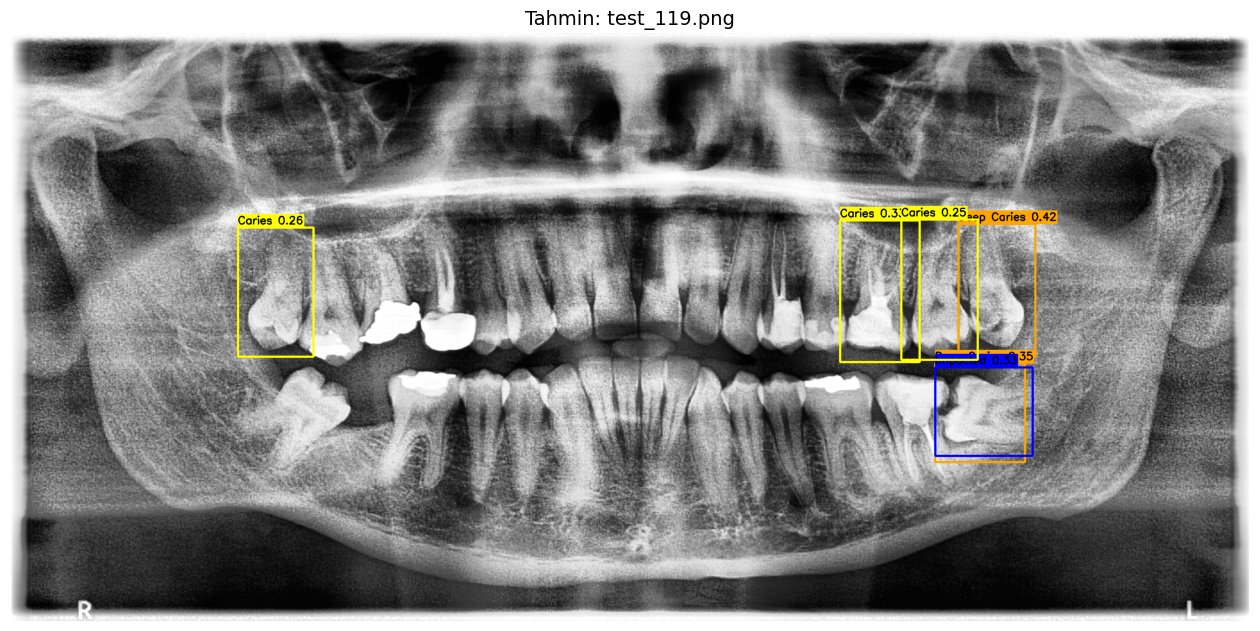

In [13]:
# Test klasöründeki tüm resimleri bul
test_files = list(TEST_IMAGES_DIR.glob("*.png"))

if not test_files:
    print("❌ Test klasöründe resim yok.")
else:
    # Rastgele bir resim seç
    random_file = random.choice(test_files)
    filename = random_file.name
    
    print(f"🖼️ Seçilen Resim: {filename}")
    
    # 1. Oku
    original_img = cv2.imread(str(random_file))
    
    # 2. CLAHE Uygula (Kritik!)
    processed_img = apply_clahe(original_img)
    
    # 3. Tahmin Et
    # imgsz=1280 eğitimle aynı olmalı
    results = model.predict(processed_img, imgsz=IMG_SIZE, conf=CONF_THRESHOLD, verbose=False)
    
    # 4. Çiz ve Göster
    plot_prediction(processed_img, results, filename)

🖼️ Seçilen Resim: test_125.png


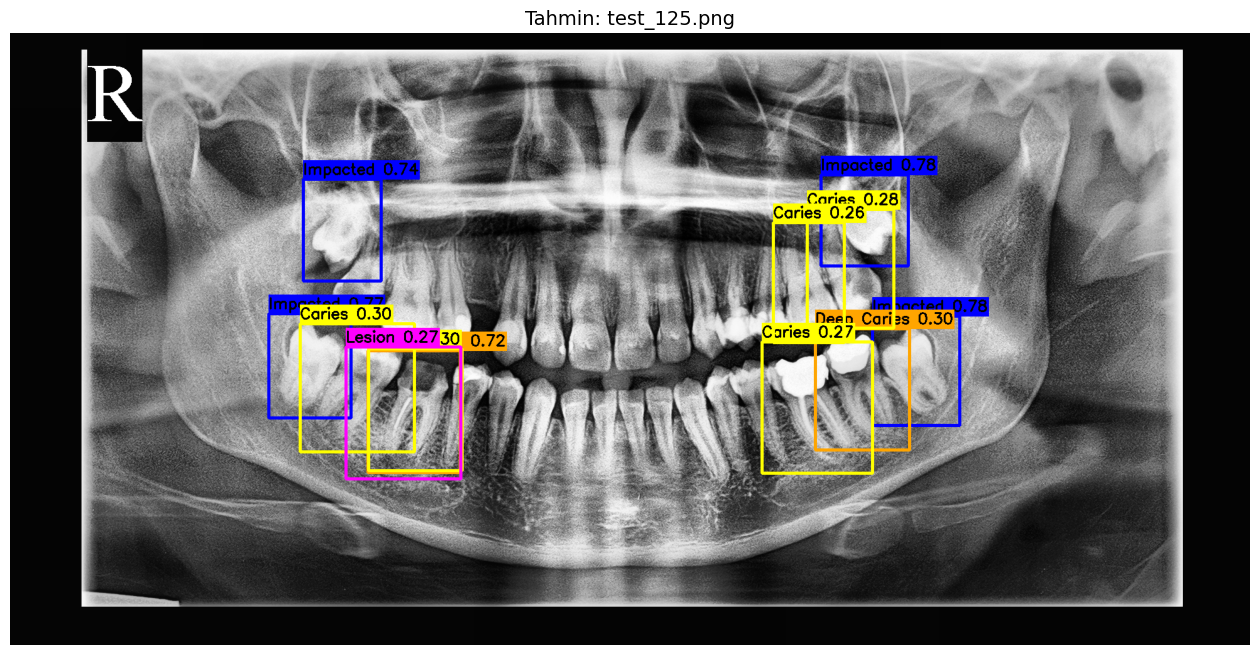

In [15]:
# Test klasöründeki tüm resimleri bul
test_files = list(TEST_IMAGES_DIR.glob("*.png"))

if not test_files:
    print("❌ Test klasöründe resim yok.")
else:
    # Rastgele bir resim seç
    random_file = random.choice(test_files)
    filename = random_file.name
    
    print(f"🖼️ Seçilen Resim: {filename}")
    
    # 1. Oku
    original_img = cv2.imread(str(random_file))
    
    # 2. CLAHE Uygula (Kritik!)
    processed_img = apply_clahe(original_img)
    
    # 3. Tahmin Et
    # imgsz=1280 eğitimle aynı olmalı
    results = model.predict(processed_img, imgsz=IMG_SIZE, conf=CONF_THRESHOLD, verbose=False)
    
    # 4. Çiz ve Göster
    plot_prediction(processed_img, results, filename)

🖼️ Seçilen Resim: test_195.png


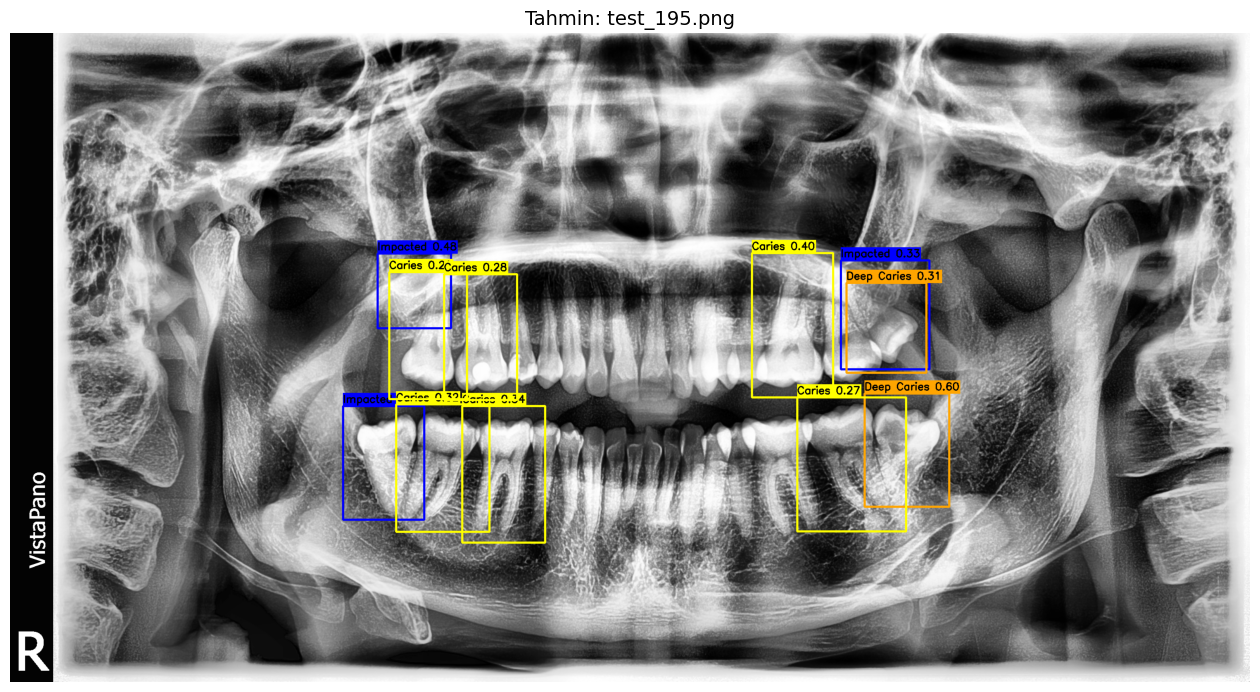

In [16]:
# Test klasöründeki tüm resimleri bul
test_files = list(TEST_IMAGES_DIR.glob("*.png"))

if not test_files:
    print("❌ Test klasöründe resim yok.")
else:
    # Rastgele bir resim seç
    random_file = random.choice(test_files)
    filename = random_file.name
    
    print(f"🖼️ Seçilen Resim: {filename}")
    
    # 1. Oku
    original_img = cv2.imread(str(random_file))
    
    # 2. CLAHE Uygula (Kritik!)
    processed_img = apply_clahe(original_img)
    
    # 3. Tahmin Et
    # imgsz=1280 eğitimle aynı olmalı
    results = model.predict(processed_img, imgsz=IMG_SIZE, conf=CONF_THRESHOLD, verbose=False)
    
    # 4. Çiz ve Göster
    plot_prediction(processed_img, results, filename)

🖼️ Seçilen Resim: test_123.png


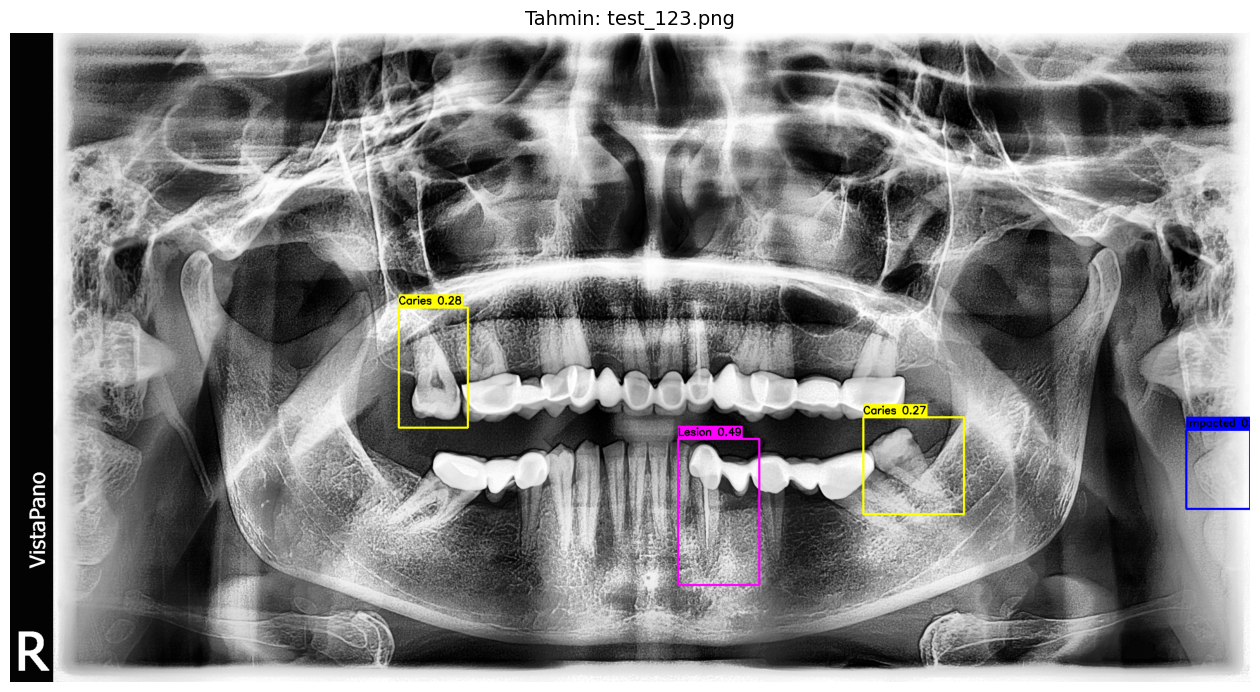

In [17]:
# Test klasöründeki tüm resimleri bul
test_files = list(TEST_IMAGES_DIR.glob("*.png"))

if not test_files:
    print("❌ Test klasöründe resim yok.")
else:
    # Rastgele bir resim seç
    random_file = random.choice(test_files)
    filename = random_file.name
    
    print(f"🖼️ Seçilen Resim: {filename}")
    
    # 1. Oku
    original_img = cv2.imread(str(random_file))
    
    # 2. CLAHE Uygula (Kritik!)
    processed_img = apply_clahe(original_img)
    
    # 3. Tahmin Et
    # imgsz=1280 eğitimle aynı olmalı
    results = model.predict(processed_img, imgsz=IMG_SIZE, conf=CONF_THRESHOLD, verbose=False)
    
    # 4. Çiz ve Göster
    plot_prediction(processed_img, results, filename)